In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [16]:
relative_path = "../../database/reviews_diningcode.csv"
input_path = os.path.abspath(relative_path)
df = pd.read_csv(input_path)

In [17]:
df.head()

,Star,Date,Comment,processed_text,day_of_week,is_weekend,month,가격,가능,가성비,...,튀김소보로,튀소,튀소구마,팥빙수,평일,포장,품절,필수,행복,회전
0,5.0,2024-11-20,대전 용운국제수영장 대회를 마치고 천안으로 올라오면서 둥이1호가 꼭 가고 싶어하던 ...,대전 용운 국제 수영장 대회 천안 성심당 본점 위치 상황 정오 주차장 주차 네이버 ...,Wednesday,False,11.0,0.082044,0.0,0.119941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,2024-11-06,태어나서 가본곳 중에 제일 기빨렸지만\n저렴하고 맛도 괜찮은 편이였다\n\n저렴하다...,봉지 부띠끄 사람 비닐 주심 센스 메아리 대전 사람 다음 대전,Wednesday,False,11.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2024-09-18,대전 여행의 알파이자 오메가인 성심당 본점입니다.\n대전 시내에 위치해있고 기차로 ...,대전 여행 알파 오메가 성심당 본점 대전 시내 위치 기차 도보 거리 주차 주차장 주...,Wednesday,False,9.0,0.102806,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2024-08-01,역시나 평일인데도 사람이 많았어요. 본점인데도 가게 내부 통로가 좁아서 이동하기 조...,평일 사람 가게 내부 통로 이동 불편 종류 실패 애플 브리 치즈 샌드위치 기대,Thursday,False,8.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2024-08-14,일단 대기가 길다는 것을 예상하고 가셔야 합니다 메뉴는 정말 많아서 생각하고 가셔도...,대기 예상 메뉴 생각 추천 내부 이곳저곳,Wednesday,False,8.0,0.234923,0.0,0.114478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


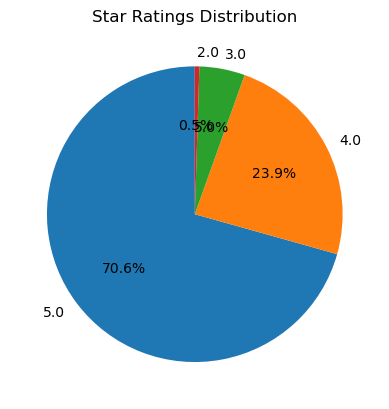

In [18]:
# Star 값들의 빈도를 계산
star_counts = df['Star'].value_counts()

# Pie chart 그리기
fig, ax = plt.subplots()
ax.pie(
    star_counts.values,  # 값 리스트
    labels=star_counts.index,  # 라벨
    autopct='%1.1f%%',  # 퍼센트 표시 형식
    startangle=90
)

# 제목 설정
ax.set_title("Star Ratings Distribution")

# 그래프 보여주기
plt.show()

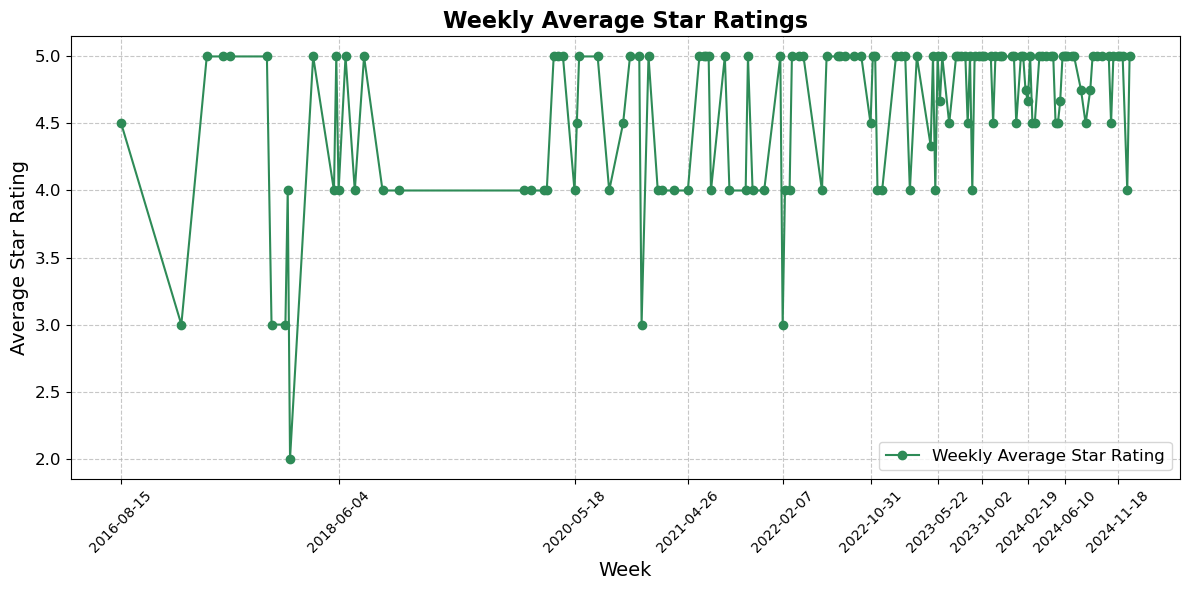

In [20]:
# 'Date'를 datetime 형식으로 변환하며, 잘못된 형식은 제거
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 잘못된 값은 NaT로 처리

# NaT 값 제거
df = df.dropna(subset=['Date'])

# 일주일 단위로 그룹화하여 평균 Star 계산
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)  # 주 단위 시작 날짜
weekly_star_avg = df.groupby('Week')['Star'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 주별 평균 별점 선 그래프
plt.plot(weekly_star_avg.index, weekly_star_avg.values, marker='o', linestyle='-', color='seagreen', label='Weekly Average Star Rating')

# 그래프 제목 및 축 레이블
plt.title("Weekly Average Star Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Week", fontsize=14)
plt.ylabel("Average Star Rating", fontsize=14)

# X축 간격 줄이기
plt.xticks(weekly_star_avg.index[::max(1, len(weekly_star_avg)//10)], rotation=45, fontsize=10)  # 데이터가 많으면 일부만 표시
plt.yticks(fontsize=12)

# 그리드 추가
plt.grid(visible=True, linestyle='--', alpha=0.7)

# 범례 추가
plt.legend(fontsize=12)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

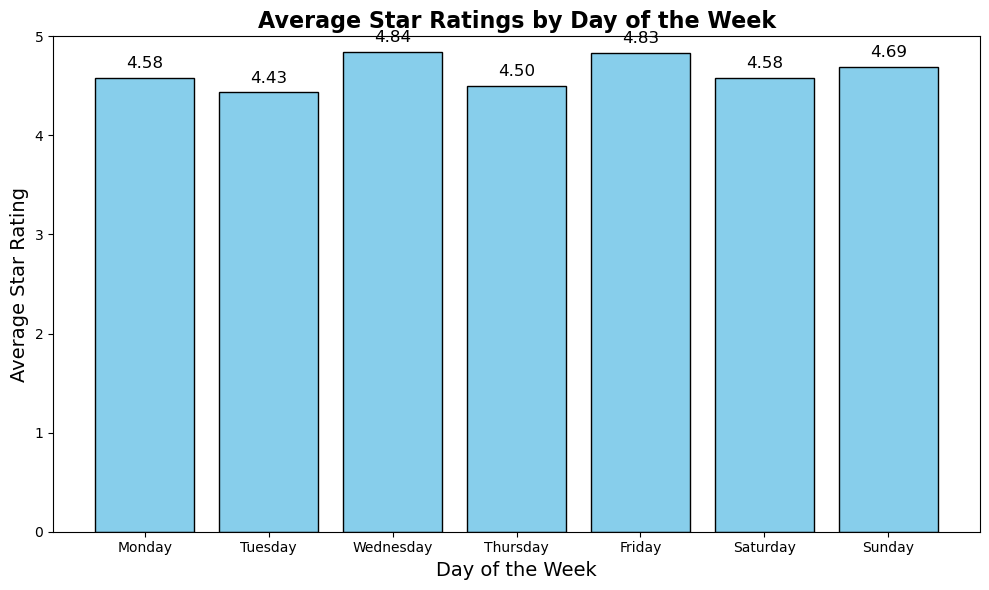

In [21]:
# 요일별 평균 별점 계산
day_star_avg = df.groupby('day_of_week')['Star'].mean()

# 요일 순서 정렬
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_star_avg = day_star_avg.reindex(day_order)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(day_star_avg.index, day_star_avg.values, color='skyblue', edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title("Average Star Ratings by Day of the Week", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Star Rating", fontsize=14)

# Y축 범위 조정
plt.ylim(0, 5)

# 값 표시
for i, v in enumerate(day_star_avg.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()